<a href="https://colab.research.google.com/github/yashvii5/Yelp-Business-Data-Analysis-and-Recommender-System-/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_business=pd.read_json('/content/drive/MyDrive/USML Project/yelp_academic_dataset_business.json', lines=True)

In [ ]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [ ]:
df_business['attributes'][9]

{'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
 'ByAppointmentOnly': 'False',
 'RestaurantsPriceRange2': '3'}

In [ ]:
#df_checkin=pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

In [ ]:
#df_checkin

,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,"2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010..."
2,--164t1nclzzmca7eDiJMw,"2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010..."
3,--2aF9NhXnNVpDV0KS3xBQ,"2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015..."
4,--2mEJ63SC_8_08_jGgVIg,"2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015..."
...,...,...
138871,zzoUa7lyeM-qKPKFYSrAhg,"2012-10-12 17:11:06, 2012-10-22 23:38:12, 2012..."
138872,zzpmoTVq4yn86U7ArHyFBQ,"2020-07-18 18:33:18, 2020-07-18 20:13:49, 2020..."
138873,zzqq8J7Pibxod1YcknlkWA,"2014-08-29 00:00:54, 2014-10-23 19:00:58, 2017..."
138874,zzwK-TJsCJX5wZrdtKemPg,"2010-08-29 17:39:58, 2010-10-25 22:58:03, 2011..."


In [ ]:
#df_checkin['date'][6]

'2014-08-02 14:12:55, 2015-02-21 17:37:57'

In [ ]:
#df_tip=pd.read_json('yelp_academic_dataset_tip.json', lines=True)

In [ ]:
#df_tip

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0
...,...,...,...,...,...
1162114,OAf2rC_Btse6aRc9LCyApw,BYKjzEUv6RksSVm5yqGPDA,Perfect!,2020-05-30 20:01:46,0
1162115,bI5zqhhpU4SlW-5BN6M1uw,C2kDo2CFGP_0073dgMmZNw,Love these guys! My go to place,2015-07-18 17:21:40,0
1162116,vDMl9JwvkRNRVt_rjpQdZg,4CxF8c3MB7VAdY8zFb2cZQ,Overrated.,2020-07-23 04:02:10,0
1162117,iCc7UVah7zE1UwYPP3FcTg,IEHoGw0V5Lbdf4TJU58K0Q,"Best place for men, call for an appointment an...",2020-09-23 23:16:57,0


In [ ]:
#df_review = pd.read_json('yelp_academic_dataset_review.json', lines=True)

In [ ]:
#df_review.to_csv('review.csv')

In [ ]:
#counts = df_review['business_id'].value_counts()

In [ ]:
#counts.head(10)

4CxF8c3MB7VAdY8zFb2cZQ    9295
OQ2oHkcWA8KNC1Lsvj1SBA    7394
PrsvO1rzkgg6qFizlAoEtg    7385
zioLxtBc9THNS2TOn9xW1w    6325
y2w6rFaO0XEiG5mFfOsiFA    5220
MGzro82Fi4LYvc86acoONQ    5071
cs6HfZNykLVitm09jWFqWg    4901
bZiIIUcpgxh8mpKMDhdqbA    4818
qLJUDPOamhLdbtfbcWyHnA    4628
n73rxa6e6-fTIxQzfv4BuA    4560
Name: business_id, dtype: int64

In [ ]:


#tr = df_review[(df_review['business_id'] == '4CxF8c3MB7VAdY8zFb2cZQ') | (df_review['business_id'] == 'OQ2oHkcWA8KNC1Lsvj1SBA') | (df_review['business_id'] == 'PrsvO1rzkgg6qFizlAoEtg') | (df_review['business_id'] == 'zioLxtBc9THNS2TOn9xW1w') | (df_review['business_id'] == 'y2w6rFaO0XEiG5mFfOsiFA') | (df_review['business_id'] == 'MGzro82Fi4LYvc86acoONQ')| (df_review['business_id'] == 'cs6HfZNykLVitm09jWFqWg')| (df_review['business_id'] == 'bZiIIUcpgxh8mpKMDhdqbA')| (df_review['business_id'] == 'qLJUDPOamhLdbtfbcWyHnA')| (df_review['business_id'] == 'n73rxa6e6-fTIxQzfv4BuA')]


In [ ]:
#tr_negative = tr[tr['stars'] < 3.0]


tr_negative = pd.read_csv("/content/drive/MyDrive/USML Project/tr_negative.csv")
tr_negative

,Unnamed: 0,review_id,user_id,business_id,stars,text,date
0,1906,xjJ32ibC1aAG3oHzcU_Erg,UaytjamII34RHjc1uLYDMw,bZiIIUcpgxh8mpKMDhdqbA,2,"What we loved about Hopdoddy:\n- Alex, our ser...",2011-02-13 16:12:11
1,2185,5XhkhGOTp8gYxZzdLFEN5w,laPY9uEUAoizS85_i1gBPg,bZiIIUcpgxh8mpKMDhdqbA,2,I ordered Primetime which cost around $13 with...,2017-01-02 03:37:28
2,3116,4rzGVTn0goU7ZPDl3kxf6A,XPpVivIsb36oNaZx8zGofg,bZiIIUcpgxh8mpKMDhdqbA,1,Do I really need to told how good everything i...,2011-10-27 19:51:58
3,5021,pIYT_t8tmreM6MTDyV9tVQ,T0ZxZzWjKruqoZhI0YK0aw,bZiIIUcpgxh8mpKMDhdqbA,2,Maybe my expectations were too high because of...,2016-12-19 15:15:27
4,5427,J2ZnWmYl8GDEtDQyT7tcTw,p2PpidC2QHa9KVGVAVcxzA,bZiIIUcpgxh8mpKMDhdqbA,2,I have loved HopDoddy since they took over Cis...,2018-06-26 19:33:05
...,...,...,...,...,...,...,...
6120,8621992,Y6ugI1FUnIX2aySsWC47jw,euFB2NDQSwcVp7wcJ2EVgw,y2w6rFaO0XEiG5mFfOsiFA,2,Not bad. Not as good as their reputation. Joh...,2020-08-21 21:51:28
6121,8625306,UYuwWSILMH2RTUW1FMoLSQ,8NZofLVX7iKxOKg4xTIzJA,y2w6rFaO0XEiG5mFfOsiFA,1,This place has THE BEST FOOD EVER.\n\nBut we s...,2018-10-10 00:55:33
6122,8630701,KoSzeznqpjwbRkx9D4zF7w,AOVv7O3jf0IFjQO7-tdQfg,y2w6rFaO0XEiG5mFfOsiFA,1,I have never been SOOOO sick! I had a horribl...,2007-06-16 22:10:24
6123,8634960,iMIplrftO3omVHCJdrzpNQ,BfelBY7qgGq_MNYeRVvTaw,y2w6rFaO0XEiG5mFfOsiFA,1,GO TO ATLANTIC FISH CO INSTEAD! \n\nThis place...,2019-11-23 22:48:05


In [ ]:
#tr_negative.to_csv('tr_negative.csv')

In [ ]:
tr_negative['business_id'].value_counts()

4CxF8c3MB7VAdY8zFb2cZQ    1914
zioLxtBc9THNS2TOn9xW1w    1085
PrsvO1rzkgg6qFizlAoEtg     655
qLJUDPOamhLdbtfbcWyHnA     459
y2w6rFaO0XEiG5mFfOsiFA     442
OQ2oHkcWA8KNC1Lsvj1SBA     365
bZiIIUcpgxh8mpKMDhdqbA     342
n73rxa6e6-fTIxQzfv4BuA     324
MGzro82Fi4LYvc86acoONQ     288
cs6HfZNykLVitm09jWFqWg     251
Name: business_id, dtype: int64

In [ ]:
reviews = pd.merge(tr_negative, df_business, on='business_id')

In [ ]:
reviews['name'].value_counts()

Voodoo Doughnut - Old Town     1914
Pok Pok                        1085
Mike's Pastry                   655
The Salt Lick BBQ               459
Neptune Oyster                  442
Screen Door                     365
Hopdoddy Burger Bar             342
Mother’s Bistro & Bar           324
Franklin Barbecue               288
Moonshine Patio Bar & Grill     251
Name: name, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction import _stop_words
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')


from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def text_clean(text):
    text = text.lower()  #lowercase
    words = nltk.word_tokenize(text)    #tokenize
    new_words= [word for word in words if word.isalpha()]   #Remove punctuations and numbers
    nostop = [words for words in new_words if words not in stop_words]    #Remove stopwords
    #nopos = [words for words in nostop if words not in positive_words] 
    lema = [lemmatizer.lemmatize(words) for words in nostop]   #lemmatize words
    nn = " ".join(lema)
    return(nn)

In [ ]:
reviews['text'] = reviews['text'].map(text_clean)
reviews['text']

0       loved hopdoddy alex server extremely attentive...
1       ordered primetime cost around hope eat somethi...
2       really need told good everything great going t...
3       maybe expectation high many good review dunno ...
4       loved hopdoddy since took cissi spot congress ...
                              ...                        
6120    bad good reputation johnny cake decent wife sa...
6121    place best food ever sat bar bartender really ...
6122    never soooo sick horrible case food poisoning ...
6123    go atlantic fish co instead place beyond disap...
6124    awful service called hour ahead take reservati...
Name: text, Length: 6125, dtype: object

In [ ]:
reviews

,Unnamed: 0,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,1906,xjJ32ibC1aAG3oHzcU_Erg,UaytjamII34RHjc1uLYDMw,bZiIIUcpgxh8mpKMDhdqbA,2,loved hopdoddy alex server extremely attentive...,2011-02-13 16:12:11,Hopdoddy Burger Bar,"1400 S Congress Ave, Ste A190",Austin,TX,78704,30.249649,-97.749907,4.0,4708,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","American (New), American (Traditional), Restau...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
1,2185,5XhkhGOTp8gYxZzdLFEN5w,laPY9uEUAoizS85_i1gBPg,bZiIIUcpgxh8mpKMDhdqbA,2,ordered primetime cost around hope eat somethi...,2017-01-02 03:37:28,Hopdoddy Burger Bar,"1400 S Congress Ave, Ste A190",Austin,TX,78704,30.249649,-97.749907,4.0,4708,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","American (New), American (Traditional), Restau...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
2,3116,4rzGVTn0goU7ZPDl3kxf6A,XPpVivIsb36oNaZx8zGofg,bZiIIUcpgxh8mpKMDhdqbA,1,really need told good everything great going t...,2011-10-27 19:51:58,Hopdoddy Burger Bar,"1400 S Congress Ave, Ste A190",Austin,TX,78704,30.249649,-97.749907,4.0,4708,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","American (New), American (Traditional), Restau...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,5021,pIYT_t8tmreM6MTDyV9tVQ,T0ZxZzWjKruqoZhI0YK0aw,bZiIIUcpgxh8mpKMDhdqbA,2,maybe expectation high many good review dunno ...,2016-12-19 15:15:27,Hopdoddy Burger Bar,"1400 S Congress Ave, Ste A190",Austin,TX,78704,30.249649,-97.749907,4.0,4708,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","American (New), American (Traditional), Restau...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4,5427,J2ZnWmYl8GDEtDQyT7tcTw,p2PpidC2QHa9KVGVAVcxzA,bZiIIUcpgxh8mpKMDhdqbA,2,loved hopdoddy since took cissi spot congress ...,2018-06-26 19:33:05,Hopdoddy Burger Bar,"1400 S Congress Ave, Ste A190",Austin,TX,78704,30.249649,-97.749907,4.0,4708,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","American (New), American (Traditional), Restau...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,8621992,Y6ugI1FUnIX2aySsWC47jw,euFB2NDQSwcVp7wcJ2EVgw,y2w6rFaO0XEiG5mFfOsiFA,2,bad good reputation johnny cake decent wife sa...,2020-08-21 21:51:28,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
6121,8625306,UYuwWSILMH2RTUW1FMoLSQ,8NZofLVX7iKxOKg4xTIzJA,y2w6rFaO0XEiG5mFfOsiFA,1,place best food ever sat bar bartender really ...,2018-10-10 00:55:33,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
6122,8630701,KoSzeznqpjwbRkx9D4zF7w,AOVv7O3jf0IFjQO7-tdQfg,y2w6rFaO0XEiG5mFfOsiFA,1,never soooo sick horrible case food poisoning ...,2007-06-16 22:10:24,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
6123,8634960,iMIplrftO3omVHCJdrzpNQ,BfelBY7qgGq_MNYeRVvTaw,y2w6rFaO0XEiG5mFfOsiFA,1,go atlantic fish co instead place beyond disap...,2019-11-23 22:48:05,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."


In [ ]:
'''voodoo_review = []
for doc in range(len(reviews['text'])):
    if reviews['business_id'][doc] == '4CxF8c3MB7VAdY8zFb2cZQ':
        voodoo_review.append(reviews['text'])

print(voodoo_review) ''' 

'4CxF8c3MB7VAdY8zFb2cZQ' 

voodoo_review = reviews[reviews['business_id'] == 'zioLxtBc9THNS2TOn9xW1w'] 
voodoo_review 

#pok_pok = reviews[reviews['business_id'] == 'zioLxtBc9THNS2TOn9xW1w'] 


,Unnamed: 0,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
593,862271,pklGVB06gmDpSr2pL9MoWQ,GGjlMc15S4iOS8tZ7Jka5A,zioLxtBc9THNS2TOn9xW1w,1,overrated state came great review yelp love th...,2014-01-17 08:36:57,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
594,863223,nGhJKEsp0kO-D8tJx1Pv3g,vevxXFvWJk9fFYQy7YcdaA,zioLxtBc9THNS2TOn9xW1w,1,definately like cartoon food ordered sausage g...,2014-01-17 06:01:33,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
595,863386,YiftAtx1s1t6DpD0CuIhzQ,N2ojrNQ399HQZnFKif3cIA,zioLxtBc9THNS2TOn9xW1w,2,first time ate pok pok close year ago thought ...,2013-02-21 23:10:43,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
596,864342,ELGY-g9UhIM6l52FFoomUg,fTnl5aYcdS31Cs2QtIx8xw,zioLxtBc9THNS2TOn9xW1w,1,well guess going rip cuisine culture way metal...,2010-03-25 01:50:30,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
597,864770,In1mQ-J_a-ygzQfH9WV7Rg,6-c4pRDCLLCT9PKyQ05ADA,zioLxtBc9THNS2TOn9xW1w,2,food price service ambience food network best ...,2017-08-16 05:31:27,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1684185,lPEboD75TtR2se18aY3jcA,88tgG4VL6hjyIk-vdwqxxw,zioLxtBc9THNS2TOn9xW1w,2,food definitely overhyped ordered wing noodle ...,2020-10-09 05:56:16,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1674,1688162,FDobQduT-uuMtMLf5gqkpA,wIGsstw2fanI2dN8vqzsew,zioLxtBc9THNS2TOn9xW1w,1,repeat dont food horrible people work customer...,2020-04-11 03:11:53,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1675,1695617,3gY6uKSN2lEnsD3xs90HMA,88tgG4VL6hjyIk-vdwqxxw,zioLxtBc9THNS2TOn9xW1w,2,food definitely overhyped ordered wing noodle ...,2020-02-16 05:18:48,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1676,1699067,ZLSz4lYXIswl7nAtGhz-zQ,XXZwX4E_CjJoe2bvCJzb3w,zioLxtBc9THNS2TOn9xW1w,1,come tourist trap disappointed pok pok dish ra...,2017-03-15 17:44:13,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(voodoo_review['text'].values.astype('U'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

no_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(voodoo_review['text'].values.astype('U'))
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)



In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 7
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
waitstaff story hearing pokpok similar rude street
Topic 1:
pok seated hour america wait ordered restaurant
Topic 2:
pok food portland place better service great
Topic 3:
food pok wing place thai good like
Topic 4:
food wait wing good place chicken dish
Topic 5:
food pok reservation table family thai wait
Topic 6:
cash america place food star good pok


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=7, algorithm='randomized', n_iter=10, random_state=0).fit(tfidf)
display_topics(lsa, tfidf_feature_names, no_top_words)

Topic 0:
food pok wing thai place good dish
Topic 1:
pok food table time minute staff wait
Topic 2:
pok sauce wing fish dish rice salad
Topic 3:
table wait minute hour hostess time seated
Topic 4:
wait wing fish worth sauce hour pok
Topic 5:
portion small price wing good hype worth
Topic 6:
chicken salad thai noodle papaya salty worth


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=7, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int

Topic 0:
thai food restaurant place authentic portland better
Topic 1:
wing chicken dish salad salty noodle ordered
Topic 2:
pok experience staff portland lounge dish special
Topic 3:
table time minute service food seated hostess
Topic 4:
wait worth hour hype long line wing
Topic 5:
portion small price food good overpriced high
Topic 6:
fish sauce wing taste like vietnamese better


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lst = reviews.text.values.tolist()
lst[:2]

['loved hopdoddy alex server extremely attentive friendly atmosphere hip enough soco large urban city beer selection refined selection micro brew chipolte catsup home made goodness sweet right amount heat chile cheese used dipping sauce burger yum camaraderie fellow diner waiting min queue fun strike conversation dining experience starting feel like e ticket ride disney something great line reward patience really wanted like whole dining experience hopdoddy burger unfortunately dry accompanying veggie maintain expected crispness queuing concept la fuddruckers could effective smiling face waiting take order arrived past saturday night told wait order food would min step front door know expecting saturday night god sake luckily queue flow past bar able pick drink waiting like good trooper made best experience focusing thing enjoy evening chatting people queue marveling creative way top table could transformed accommodate combination various sized dining party merely moving panel resemble

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

words = list(sent_to_words(lst))
words[:2]

[['loved',
  'hopdoddy',
  'alex',
  'server',
  'extremely',
  'attentive',
  'friendly',
  'atmosphere',
  'hip',
  'enough',
  'soco',
  'large',
  'urban',
  'city',
  'beer',
  'selection',
  'refined',
  'selection',
  'micro',
  'brew',
  'chipolte',
  'catsup',
  'home',
  'made',
  'goodness',
  'sweet',
  'right',
  'amount',
  'heat',
  'chile',
  'cheese',
  'used',
  'dipping',
  'sauce',
  'burger',
  'yum',
  'camaraderie',
  'fellow',
  'diner',
  'waiting',
  'min',
  'queue',
  'fun',
  'strike',
  'conversation',
  'dining',
  'experience',
  'starting',
  'feel',
  'like',
  'ticket',
  'ride',
  'disney',
  'something',
  'great',
  'line',
  'reward',
  'patience',
  'really',
  'wanted',
  'like',
  'whole',
  'dining',
  'experience',
  'hopdoddy',
  'burger',
  'unfortunately',
  'dry',
  'accompanying',
  'veggie',
  'maintain',
  'expected',
  'crispness',
  'queuing',
  'concept',
  'la',
  'fuddruckers',
  'could',
  'effective',
  'smiling',
  'face',
  'w

In [ ]:
bigram = gensim.models.Phrases(words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['loved', 'hopdoddy', 'alex', 'server', 'extremely', 'attentive', 'friendly', 'atmosphere', 'hip', 'enough', 'soco', 'large', 'urban', 'city', 'beer', 'selection', 'refined', 'selection', 'micro', 'brew', 'chipolte', 'catsup', 'home', 'made', 'goodness', 'sweet', 'right', 'amount', 'heat', 'chile', 'cheese', 'used', 'dipping_sauce', 'burger', 'yum', 'camaraderie', 'fellow', 'diner', 'waiting', 'min', 'queue', 'fun', 'strike', 'conversation', 'dining', 'experience', 'starting', 'feel', 'like', 'ticket', 'ride', 'disney', 'something', 'great', 'line', 'reward', 'patience', 'really', 'wanted', 'like', 'whole', 'dining', 'experience', 'hopdoddy', 'burger', 'unfortunately', 'dry', 'accompanying', 'veggie', 'maintain', 'expected', 'crispness', 'queuing', 'concept', 'la', 'fuddruckers', 'could', 'effective', 'smiling_face', 'waiting', 'take', 'order', 'arrived', 'past', 'saturday_night', 'told', 'wait', 'order', 'food', 'would', 'min', 'step', 'front', 'door', 'know', 'expecting', 'saturday_n

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
words_nostops = remove_stopwords(words)

# Form Bigrams
words_bigrams = make_bigrams(words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
bad_words_lemmatized = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(bad_words_lemmatized[:1])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

[['love', 'server', 'extremely', 'attentive', 'friendly', 'atmosphere', 'hip', 'enough', 'large', 'urban', 'city', 'beer', 'selection', 'refined', 'selection', 'home', 'make', 'goodness', 'sweet', 'right', 'amount', 'heat', 'chile', 'cheese', 'use', 'burger', 'wait', 'queue', 'fun', 'strike', 'conversation', 'dining', 'experience', 'start', 'feel', 'ticket', 'ride', 'disney', 'great', 'line', 'reward', 'patience', 'really', 'want', 'whole', 'dining', 'experience', 'hopdoddy', 'unfortunately', 'dry', 'accompany', 'veggie', 'maintain', 'expect', 'crispness', 'queuing', 'concept', 'fuddrucker', 'could', 'effective', 'wait', 'take', 'order', 'arrive', 'tell', 'wait', 'order', 'food', 'would', 'min', 'know', 'expect', 'sake', 'luckily', 'queue', 'flow', 'bar', 'able', 'pick', 'drink', 'wait', 'good', 'trooper', 'make', 'good', 'experience', 'focus', 'thing', 'enjoy', 'evening', 'chat', 'people', 'queue', 'marvel', 'creative', 'way', 'top', 'table', 'could', 'transform', 'accommodate', 'comb

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(bad_words_lemmatized)

# Create Corpus
texts = bad_words_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 4), (99, 1), (100, 1), (101, 1), (102, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('accommodate', 1),
  ('accompany', 1),
  ('amazing', 1),
  ('amount', 1),
  ('arrive', 1),
  ('atmosphere', 1),
  ('attentive', 1),
  ('bar', 1),
  ('beer', 1),
  ('burger', 1),
  ('chat', 1),
  ('cheese', 2),
  ('chile', 2),
  ('city', 1),
  ('combination', 1),
  ('concept', 1),
  ('conversation', 1),
  ('could', 2),
  ('creative', 1),
  ('crispness', 1),
  ('demarcation', 1),
  ('dining', 3),
  ('dinner', 1),
  ('disney', 1),
  ('drink', 1),
  ('dry', 1),
  ('effective', 1),
  ('enjoy', 1),
  ('enough', 1),
  ('establish', 1),
  ('evening', 1),
  ('expect', 2),
  ('experience', 3),
  ('extremely', 1),
  ('fact', 1),
  ('feel', 1),
  ('flow', 1),
  ('focus', 1),
  ('food', 1),
  ('friendly', 1),
  ('fuddrucker', 1),
  ('fun', 1),
  ('good', 2),
  ('goodness', 1),
  ('great', 1),
  ('heat', 1),
  ('hip', 1),
  ('home', 1),
  ('hopdoddy', 1),
  ('know', 1),
  ('large', 1),
  ('line', 2),
  ('love', 1),
  ('luckily', 1),
  ('maintain', 1),
  ('make', 2),
  ('marvel', 1)

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(voodoo_review['text'])
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

[['overrate', 'state', 'come', 'great', 'review', 'yelp', 'love', 'food', 'really', 'excited', 'try', 'place', 'luckily', 'get', 'seat', 'problem', 'first', 'problem', 'waiter', 'extremely', 'pretentious', 'guy', 'serve', 'seem', 'want', 'spend', 'time', 'talk', 'server', 'actually', 'tend', 'customer', 'secondly', 'food', 'way', 'average', 'try', 'famous', 'chicken', 'wing', 'expensive', 'much', 'well', 'food', 'la', 'want', 'good', 'authentic', 'food', 'definitely', 'come']]


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40295699719226813


In [ ]:
# # Enable logging for gensim - optional
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging)

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

words = list(sent_to_words(voodoo_review['text']))
words[:2]

[['overrated',
  'state',
  'came',
  'great',
  'review',
  'yelp',
  'love',
  'thai',
  'food',
  'really',
  'excited',
  'try',
  'place',
  'luckily',
  'got',
  'seated',
  'within',
  'min',
  'problem',
  'first',
  'problem',
  'waiter',
  'extremely',
  'pretentious',
  'guy',
  'serve',
  'seem',
  'like',
  'want',
  'spends',
  'time',
  'talking',
  'server',
  'actually',
  'tends',
  'customer',
  'secondly',
  'food',
  'way',
  'average',
  'tried',
  'famous',
  'chicken',
  'wing',
  'papaya',
  'salad',
  'larb',
  'kao',
  'soi',
  'disappointing',
  'plus',
  'expensive',
  'much',
  'better',
  'thai',
  'food',
  'la',
  'bay',
  'area',
  'sd',
  'etc',
  'want',
  'good',
  'authentic',
  'thai',
  'food',
  'definitely',
  'come'],
 ['definately',
  'like',
  'cartoon',
  'food',
  'ordered',
  'sausage',
  'good',
  'plated',
  'five',
  'baby',
  'greenbeans',
  'tied',
  'like',
  'pretzel',
  'one',
  'inch',
  'wedge',
  'cold',
  'steamed',
  'cabbage

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bad_words_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.0533621897294605

Coherence Score:  0.4308855526987145


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
#from pyLDAvis import gensim
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Visualize the topics
#clustering of the topics.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.238571  0.040390       1        1  36.049891
8      0.153601 -0.086319       2        1  14.944498
6      0.173703 -0.006203       3        1  13.995233
5      0.154690 -0.155358       4        1  13.549200
0      0.136520  0.163437       5        1  10.612174
4     -0.106965  0.194128       6        1   3.373094
2     -0.115858  0.067223       7        1   2.724587
1     -0.132752 -0.165341       8        1   2.425130
3     -0.252314 -0.024497       9        1   1.372553
9     -0.249195 -0.027460      10        1   0.953640, topic_info=            Term        Freq       Total Category  logprob  loglift
42          wing  924.000000  924.000000  Default  30.0000  30.0000
116          pok  878.000000  878.000000  Default  29.0000  29.0000
195        taste  384.000000  384.000000  Default  28.0000  28.0000
123        table  351.000000  351.000000  Default  27.0000  27.0000
329         wait  658.000000  658.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1269      repeat    2.314188   10.378821  Topic10  -5.4773   3.1519
2783        soak    2.403500   17.412642  Topic10  -5.4395   2.6724
1837  apparently    2.415693   19.275551  Topic10  -5.4344   2.5758
878        local    2.284299   18.576190  Topic10  -5.4903   2.5568
697         read    2.305228   39.836549  Topic10  -5.4812   1.8030

[663 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2255      4  0.875282       accept
1715      5  0.897839   acceptable
2827      2  0.937565  accommodate
457       3  0.908515  acknowledge
44        1  0.948383       actual
...     ...       ...          ...
1274      2  0.194607          yet
1274     10  0.778429          yet
4007      7  0.949412        yield
2756      9  0.794172         yike
2282      3  0.961517        yummy

[1218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 7, 6, 1, 5, 3, 2, 4, 10])

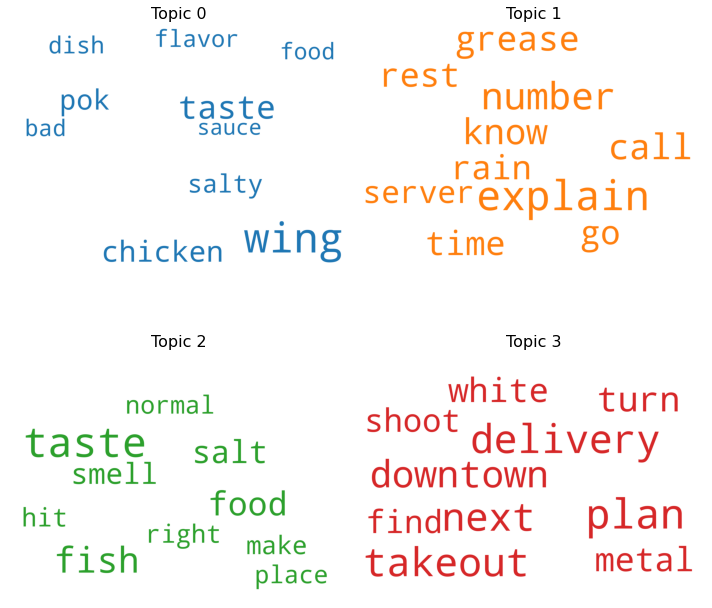

In [ ]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()